In [1]:
# Normal Sci. Comp. Imports
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
# create random number generator for later/throughout
rng = np.random.default_rng(seed=120695)

In [2]:
# Load the keras data set module:
from tensorflow.keras.datasets import fashion_mnist
# with fashion mnist model data is already partitioned into training and validation
(X, Y), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_valid = X[:48000], X[48000:]
y_train, y_valid = Y[:48000], Y[48000:]

The data consists of 70,000 images of fashion items. The partition of the above data set is such that the training data set contains 60,000 images and the testing data set contains the other 10,000. Each images is a 28 by 28 2D array of integer values. There is only 10 labels. We will split the training data set further to have a validation set consisting of the final 12000 images in the training data sets. 

In [3]:
print(f"The shape of the training data matrix/array is \n {x_train.shape} ")
print(f"the shape of the validation data matrix/array is \n {x_valid.shape} ")
print(f"while the shape of the test data matrix/array is \n {x_test.shape} ")
print(f"The the data type for the training array is {x_train.dtype}")
print(f"the data type for the validation array is {x_valid.dtype}")
print(f"while the data type for the test array is {x_test.dtype}")
print(f"The unique labels from the data set are {np.unique(y_valid)}")

The shape of the training data matrix/array is 
 (48000, 28, 28) 
the shape of the validation data matrix/array is 
 (12000, 28, 28) 
while the shape of the test data matrix/array is 
 (10000, 28, 28) 
The the data type for the training array is uint8
the data type for the validation array is uint8
while the data type for the test array is uint8
The unique labels from the data set are [0 1 2 3 4 5 6 7 8 9]


The images are greyscale images and so the values in the arrays are integers between 0 and 255 (inclusive) indicating the white level brightness. See below for conformation

Minimum values of images is 0 and the maximum is 255
Here is a image for reference


<IPython.core.display.Javascript object>


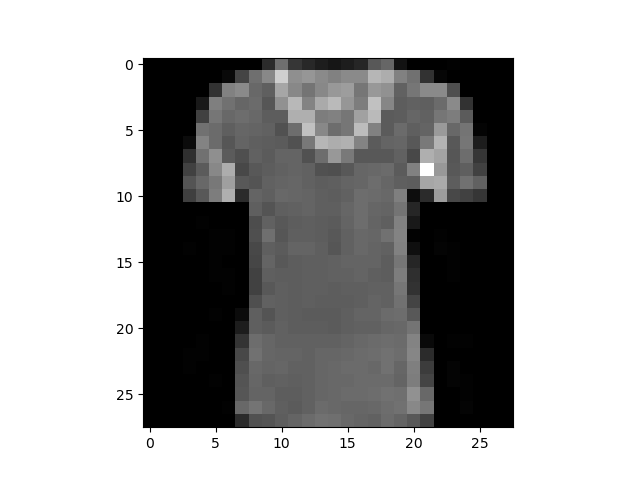

The displayed image label is 0


In [4]:
print(f"Minimum values of images is {x_train.min()} and the maximum is {x_train.max()}")
print(f"Here is a image for reference")

idx = rng.integers(low=0, high=x_train.shape[0])
image = x_train[idx]
plt.imshow(image, cmap='gray')
print(f"The displayed image label is {y_train[idx]}")

Labels are as follows for the articlse of clothing:
* 0=T-shirt/top
* 1=Trouser
* 2=Pullover
* 3=Dress
* 4=Coat
* 5=Sandal
* 6=Shirt
* 7=Sneaker
* 8=Bag
* 9=Ankle boot

## Preparing Data
Here is where we can get to experimenting and trying different things. So in deep learning there are things that can be done to make the data better to work with. In particular, for classifying the mnist data set, Nvidia tutorial suggests the 3 following data transformations/preparations:
1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

Now for simplicity I will only play around with the latter two of the preparations as I do not want to play around with other input times to the NN below. 

### Flatten (Reshape) the Image Data
So apparently we can set things up to have the nueral net model accept 2D images, but it can simplify things by `flattening` the image into a single continuous array of $28\times 28=784$ pixel values. Maybe at some point in time we can play around with 2D input for the model and see how the performance changes

In [5]:
x_train = x_train.reshape(-1, 784)
x_valid = x_valid.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print(f"x_train is now a {x_train.shape} shaped array")
print(f"x_valid is now a {x_valid.shape} shaped array")
print(f" and x_test is now a {x_test.shape} shaped array")
print(f"As an example here is the above 1D array of the above displayed image \n {x_train[idx]}")

x_train is now a (48000, 784) shaped array
x_valid is now a (12000, 784) shaped array
 and x_test is now a (10000, 784) shaped array
As an example here is the above 1D array of the above displayed image 
 [  0   0   0   0   0   0   0   0   0  43 111  54  40  29  22  29  38  88
 102  18   0   0   0   2   0   0   0   0   0   0   0   0   0   0   9  68
 111 136 207 143 150 138 129 138 138 182 173 129 113  50   6   0   0   0
   0   0   0   0   0   0   0  50 129 138 104  95 166 136 116 136 152 157
 118 152 145  97 118 138 138  79   0   0   0   0   0   0   0   0  25 127
 113 102 107  86 145 184 132 170 186 150 125 193 134  93  97  95 107 138
  50   0   0   0   0   0   0   0  66 118 104 109 104  93  93 175 175 125
 129 118 161 186  91  93 102  97 118 125  91   0   0   0   0   0   0   0
 113 107  95 102 100  97  81 109 193 136 109 118 188 129  91 107  95 100
 154 104 116   4   0   0   0   0   0  11 132 107  86 100  95  93  91  81
 120 182 173 177 132  91 100 102  88 122 179  88 118  29   0   0 

### Normalized and not nomalized data
So as was mentioned above, one way to simplify things would be normalizing the data; in the case of this image data (integer pixel values) we could do that be mapping all the integer values from the range $0-255$ into the interval $[0,1]$. This can be done by a simple division of 255 and in this case this is the normalization as each pixel can only be an integer value between 0 and 255$. We for the purposes of trying different things and testing the validity of this claim will have normalized data and non-normalized data and compare the results. 

In [6]:
norm_tr = x_train / 255
norm_va = x_valid / 255
norm_tst = x_test / 255
# double check that the values are of type float and that they are between 0 and 1
print(f"Data type of normalized data: {norm_tr.dtype}\n Min of normalized: {norm_tr.min()} and max is {norm_tr.max()}")

Data type of normalized data: float64
 Min of normalized: 0.0 and max is 1.0


### Categorical encodeing
One of the suggestions made to simply the model is to use categorical encoding: transform the data labels so that each value is a collection of all the possible categories, with the actual catgory that this particular value is set as true. The reason for doing this, according to the Nvidia Deep Learning Fundamentals workshop is that 
> ... the labels for the images are integers between 0 and 9. Because these values represent a numerical range, the model might try to draw some conclusions about its performance based on how close to the correct numerical category it guesses.

Specifically the transformation is that the values which are intended to be understood as categorical labels into a represenation that makes their categorical nature explicit to the model. As an example, if we had the labels/values of

```python
values = ['red', 'green', 'blue', 'green']
```
the categorical encoding would transform the above data labels to 
```python
values = [ 
    [1, 0, 0]
    [0, 1, 0]
    [0, 0, 1]
    [0, 1, 0]
]
```
Apparently the NN would have a harder time to making sense of the first values array/list then this harder one. Now our labels are numeric values between 0-9. We will still use categorical encoding (see below what it looks like) but will also test a model without categorical encoding. 

In [7]:
import tensorflow.keras as keras
num_categories = len(np.unique(y_train))
# use the keras library/wrapper function to create the categories
y_tr_encoded = keras.utils.to_categorical(y_train, num_categories)
y_va_encoded = keras.utils.to_categorical(y_valid, num_categories)
y_tst_encoded = keras.utils.to_categorical(y_test, num_categories)
# take a look at what the categorical encoding looks like
print(f"First ten categorical encodings: \n {y_tr_encoded[0:9]}")
print(f"the values from which the categories were transformed from:\n{y_train[0:9]}")

First ten categorical encodings: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
the values from which the categories were transformed from:
[9 0 0 3 0 2 7 2 5]


Basically the encoding changed the numeric label $x$ to the single dimensional array with the $x^{th}$ element a 1 and zeros elsewhere.

## Create the Models
In this notebook we will only be using forward feed neural networks (FFNN). We will save trying to use a convolusional neural network (CNN) on this classification problem for another notebook. So below we will create for models:
1. A model that uses the normalized data and categorical encoding of the labels (i.e. norm_tr and y_tr_encoded)
2. Another model that uses the normalized data but the original data labels- no categorical encoding (i.e. norm_tr and y_train)
3. A model with non-normalized (original) data but with categorically encoded data (i.e. x_train and y_tr_encoded)
4. No simplification model; Non-normalized data and non-categorically encoded data labels (i.e. x_train and y_train)

(What largely follows comes from the Nvidia workshop tutorial on the fundamentals of deep learning) 
### Instantiating the Model
To start off we will use Keras's Sequential model class to instantiate an instance of a model that will have 3 series of layers that data will pass though in sequence (which is why I think that this is a forward feed network). The sequential class groups  linear stacks of layers into a tensorflow/keras model. In general layers are the basic building blocks of NN within the Keras library and they consist of a tensor-in-tensor-out computation function and some state. For full documentation on the Layers within see the documentation page [here](https://keras.io/api/layers/).

In [8]:
from tensorflow.keras.models import Sequential
# model numbers relate to the numbering (listing) in the above markdown cell
model1 = Sequential() 
model2 = Sequential()
model3 = Sequential()
model4 = Sequential()

### Creating the Input Layer
Next, we will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Keras's [Dense](https://keras.io/api/layers/core_layers/dense/) layer class. 

In [9]:
from tensorflow.keras.layers import Dense

The dense layer class is just a normal densely-connected NN layer that has the following defualt input aguments:
```Python
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
``` 
For our purposes we will only be setting the activation and units arguments, both of which we detail below in more detail than is provided in the Dense lay documentation page (linked above). Regarding the other input arguments they are as follows:
* ```use_bias```: Boolean, whether the layer uses a bias vector.
* ```kernel_initializer```: Initializer for the kernel weights matrix.
* ```bias_initializer```: Initializer for the bias vector.
* ```kernel_regularizer```: Regularizer function applied to the kernel weights matrix.
* ```bias_regularizer```: Regularizer function applied to the bias vector.
* ```activity_regularizer```: Regularizer function applied to the output of the layer (its "activation").
* ```kernel_constraint```: Constraint function applied to the kernel weights matrix.
* ```bias_constraint```: Constraint function applied to the bias vector.

The Keras API says that the `units` argument is a "positive integer, dimensionality of the output space" which is just the number of neurons in the layer for our purposes. We can play around with this number but I will note that the Nvidia workshop docs  says that 512 is a good number from experimentation for the MNIST data set. They further say that in generally choosing the correct number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset but can be, and often is, a difficult and time consuming thing to do. For classifying the MNIST data set, I (Erik) have found that with just 2 hidden layers, the number of nuerons even as low as 20 still gave 95% and higher validation accuracy only after 10 epochs. For our base FF model to classify Fashion MNIST data, we will be using 256 nueron per layer. 

There is on other input argument that we pass in the ``Dense()`` call and that is for the shapr of the input: `input_shape`. This value specifies the shape of the incoming data which in our situation is a 1D array of 784 values. Keras and thus tensorflow has an `Input()` function that is used to instantiate a Keras tensor that could be used to set the number of inputs for the model like so:
```Python
# this is a logistic regression in Keras
x = Input(shape=(32,))
y = Dense(16, activation='softmax')(x)
model = Model(x, y)
```
The `Input()` function has a number of input arguments aside from the shape argument seen above but we will restrict our discussion here to the `shape` argument. For more details on the `Input()` function see [here](https://keras.io/api/layers/core_layers/input/). The API states that the shape argument is a shape tuple of integers not including the batch size. Now in Keras the the batch size, input shape, number of units in a layer and dimension are all related to each in some cases (namely ours here) do not have to all be explicited defined/set. For a lengthy explanation see this [stackoverflow](https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc) thread. We will simplify it what is on the thread as best we can here but the simple reason that they are all related to each is because what is being passed as the input and through the layers to the output are tensors and the shape of the tensors has to be known by the network prior to training. 

As we have already mentioned, the number of units is really just the number of neurons in a layer however they are related to the output shape and input shape to another layer. In general shapes are tuple that represent the number elements a tensor has in each dimension. As an example a shape of `(28, 28, 3)` is a tensor with 3 dimension that has 28 elements in the first and second dimension and with only three in the third dimension giving a total of $2652$ elements. In Keras the input layer is not actually a layer. It is a tensor and the one that is first sent to the first hidden layer which is why it must have the same shape as the training data. In our case of 48,000 images of $28\times 28$ pixels grey-scale images, the shape of our input data would be $(48000, 28, 28, 1)$ since grey-scale only has one colour channel. Normally, this would be our input layer's tensor shape buy we have converted our $28\times 28$ pixel arrays to $1\times 784$ vectors so this will not be out input shape. It will just be $(784,)$ and the reason for this still is to follow.

For a Dense layer, it requires input as `(batch_size, input_size)` or `(batch_size, optional,...,optional, input_size)` and the only thing that we have to define is the input shape with the reason simply being that we are the only one that know what it is. Unlike the other shapes used in the model, this value cannot be automatically calculated using the number of units and other features of the layers. This is why when the first layer is added keras needs its value and will throw and error somewhere done the line without it. Now if we had kept our 48,000 grey-scale images as a grid/array of $28\times 28$ pixels, our input shape would have been $(48000, 28, 28, 1)$, but keras ignores the first dimension, the batch size, with the reason seemingly being that the model should work for any batch size to just define the other dimensions (i.e `input_shape=(28, 28, 1)`). Now how does all this relate to the dimension of the input, well it can be used as a proxy for th input shape when the shape of the input is only one dimensional which is what our data is after we converted it from the grid/array pixel values. We would just give `input_dim=784` and nothing for the input shape but if we still wanted to use the `input_shape` argument instead we would give it as `input_dim=(784,)` with the comma being needed. Below when entering the input shape, we have choosen to use the  `input_shape` way as it is more expressive and cannot lead to any confusions that could arrise with the use of the the dimension keyword. 

Regarding the activation function, there are a number of activation functions to choose from and the activation funciton can be set either through using the `Activation` layer or through the `activation` argument by all forward layers. The available activations are the follow: (1) rectified linear unit activation function `'relu'`, (2) sigmoid `'sigmoid'`, (3) softmax `'softmax'`, (4) softplus `'softplus'`, (5) softsign `'softsign'`, (6) hyperbolic tangent `'htan'`, (7) scaled exponential linear unit `'selu'`, (8) eponetial linear unit `'elu'`, (9) exponential `'exponential'` (10) custom function (lets not try this). For more about these activation funtion visit [here](https://keras.io/api/layers/activations/) for some keras documentation on the layers. 

At the moment let's just play with only on activation function. If we want to use different activation function to test different models with we can do that later and probably do so by creating some wrapper functions to speed things up.

In [10]:
#Add the first hidden layer and since the input is not actually a layer
# inform the shape of the input with 784 elements (flattened image)
model1.add(Dense(units=256, activation='relu', input_shape=(784,)))
model2.add(Dense(units=256, activation='relu', input_shape=(784,)))
model3.add(Dense(units=256, activation='relu', input_shape=(784,)))
model4.add(Dense(units=256, activation='relu', input_shape=(784,)))

### Creating Hidden Layers:
So to add layer to the model we just use the add method with the arguement the layer you want. [Here](https://keras.io/api/models/sequential/#add-method) is a bit documention on the sequential model class and details on the add class at the very bottom. For now we will add 1 densely connected hidden layer. Note if we wanted to remove a layer it seems that we could use the pop method instead of add.

In [11]:
model1.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model4.add(Dense(units=256, activation='relu'))

### Create the output layer
Finally, we will add an output layer. This layer uses the activation function `softmax` which will result in each of the layer's values being a probability between 0 and 1 and will result in all the outputs of the layer adding to 1. In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output gives the model's guess (a probability) that the image belongs to that specific class:

In [12]:
model1.add(Dense(units=10, activation='softmax'))
model2.add(Dense(units=10, activation='softmax'))
model3.add(Dense(units=10, activation='softmax'))
model4.add(Dense(units=10, activation='softmax'))

### Model Summary
We can use the [summary](https://keras.io/api/models/model/#summary-method) method from the model class to get a summer of the layers, the number of parameters of the model we have created. Since we have create all the models with the same layers, nodes per layer, and activation functions per layer, the summary of any of the 4 models will be the same so we only display on summary.

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


### Compile the model
So we have yet to give the model some sort of loss function for it to optimize against the parameters as well as metric to maximize. This is done when the model is [compiled](https://keras.io/api/models/model_training_apis/#compile-method). The complie method in the class method specifically configures the model for training. There is a number of arguments to give the compile methods but here we only worry about the loss function, the metrics, and the optimization function and leave the rest to there default values (though we may want to look into them). On the possible loss functions, there are a [number](https://keras.io/api/losses/) of them. For our base model though we will be using the categorical cross entropy loss for the validation data that has been categorically encoded, in the one_hot format above, and use the sparse categorical cross entroy for the other non categorically encoded labels as theses values are given as integers which this loss function expects. We also specify that we would like to track `accuracy` while the model trains. For other metrics see [here](https://keras.io/api/metrics/). Regarding the optimization method, we will use the adam's [optimization](https://arxiv.org/pdf/1412.6980.pdf) with an initial learning rate parameter value of $\alpha=0.001$ which is the default value in tensorflow. In general, the Adam optimization method has the following default input arguments:
```Python
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)
```
where the ```beta_1``` and ```beta_2``` arguments are the exponential decay rates for the first and second moment estimates, and ```epsilon``` is a small constant for numerical stability and the ```amsgrad``` argument is used to decide whether to apply the AMSGrad variant of the algorithm. For more specifics on the Adam optimization method with in Tensorflow (and Keras) see [here](https://keras.io/api/optimizers/adam/). Now to pass this optimization method and any other one into the model, we have to pass it as argument to the model when it is compiled. For more on the optimizers and optimzation methods see [here](https://keras.io/api/optimizers/) and [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) respsectively.

In [14]:
# Define the adams method with the correct parameter values. 
opt = keras.optimizers.Adam(learning_rate=0.001)
# now compile the models with the the correct loss, metrcs and optimzation method
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model4.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

### Training the model
Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

When fitting (training) a model with Keras, we use the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method and it has the following form:
```Python
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
```
We will only give some detail about the input arguments that we will explicitly pass to the method. All the others will be left at there default values:
* **x**: Input data. It could be:
    * A Numpy array (or array-like), or a list of arrays (in case the model has multiple inputs).
    * A TensorFlow tensor, or a list of tensors (in case the model has multiple inputs).

* **y**: Target data. Like the input data x, it could be either Numpy array(s) or TensorFlow tensor(s). It should be consistent with x (i.e it cannot have Numpy inputs and tensor targets, or inversely).
* **batch_size**: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32. Do not specify the batch_size if the data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).
* **epochs**: Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided (unless the steps_per_epoch flag is set to something other than None). Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.
* **verbose**: 'auto', 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy. Note that the progress bar is not particularly useful when logged to a file, so verbose=2 is recommended when not running interactively (eg, in a production environment).
* **validation_split**: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling. This argument is not supported when x is a dataset, generator or keras.utils.Sequence instance. validation_split is not yet supported with tf.distribute.experimental.ParameterServerStrategy.
* **validation_data**: Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. Thus, note the fact that the validation loss of data provided using validation_split or validation_data is not affected by regularization layers like noise and dropout. validation_data will override validation_split. validation_data could be: - A tuple (x_val, y_val) of Numpy arrays or tensors. - A tuple (x_val, y_val, val_sample_weights) of NumPy arrays. - A tf.data.Dataset. - A Python generator or keras.utils.Sequence returning (inputs, targets) or (inputs, targets, sample_weights). validation_data is not yet supported with tf.distribute.experimental.ParameterServerStrategy.

We will train the base model with a batch size of 32. The method returns a hirstory object and its history atribute is a record of the training loss values and metrics values at successive epochs. as well as validation loss values and validation metric values.

In [15]:
history1 = model1.fit(
    x=norm_tr, y=y_tr_encoded, batch_size=32, epochs=10, verbose=1, validation_data=(norm_va, y_va_encoded)
)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4893 - accuracy: 0.8238 - val_loss: 0.4508 - val_accuracy: 0.8275
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3654 - accuracy: 0.8654 - val_loss: 0.3681 - val_accuracy: 0.8677
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3295 - accuracy: 0.8789 - val_loss: 0.3394 - val_accuracy: 0.8745
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3054 - accuracy: 0.8863 - val_loss: 0.3395 - val_accuracy: 0.8785
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.8938 - val_loss: 0.3417 - val_accuracy: 0.8777
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.8998 - val_loss: 0.3471 - val_accuracy: 0.8782
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9021 - val_loss: 0.3109 - val_accuracy:

In [16]:
history2 = model2.fit(
    x=norm_tr, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(norm_va, y_valid)
)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4668 - accuracy: 0.8299 - val_loss: 0.3918 - val_accuracy: 0.8560
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3483 - accuracy: 0.8709 - val_loss: 0.3487 - val_accuracy: 0.8713
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3174 - accuracy: 0.8814 - val_loss: 0.3932 - val_accuracy: 0.8587
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8902 - val_loss: 0.3286 - val_accuracy: 0.8819
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8946 - val_loss: 0.3184 - val_accuracy: 0.8857
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9004 - val_loss: 0.3372 - val_accuracy: 0.8798
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2538 - accuracy: 0.9049 - val_loss: 0.3271 - val_accuracy:

In [17]:
history3 = model3.fit(
    x=x_train, y=y_tr_encoded, batch_size=32, epochs=10, verbose=1, validation_data=(x_valid, y_va_encoded)
)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 4.3480 - accuracy: 0.6601 - val_loss: 0.7823 - val_accuracy: 0.7161
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7108 - accuracy: 0.7392 - val_loss: 0.6961 - val_accuracy: 0.7657
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6631 - accuracy: 0.7545 - val_loss: 1.4125 - val_accuracy: 0.7423
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6435 - accuracy: 0.7711 - val_loss: 0.8553 - val_accuracy: 0.7592
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6319 - accuracy: 0.7709 - val_loss: 0.6638 - val_accuracy: 0.7477
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6286 - accuracy: 0.7694 - val_loss: 0.6031 - val_accuracy: 0.7857
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5394 - accuracy: 0.8096 - val_loss: 0.5153 - val_accuracy:

In [18]:
history4 = model4.fit(
    x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 3.2072 - accuracy: 0.6667 - val_loss: 0.7914 - val_accuracy: 0.7218
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7264 - accuracy: 0.7467 - val_loss: 0.7334 - val_accuracy: 0.7557
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7121 - accuracy: 0.7524 - val_loss: 0.7208 - val_accuracy: 0.7658
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6579 - accuracy: 0.7682 - val_loss: 0.6216 - val_accuracy: 0.7960
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5891 - accuracy: 0.7868 - val_loss: 0.5668 - val_accuracy: 0.8007
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5507 - accuracy: 0.7939 - val_loss: 0.5229 - val_accuracy: 0.8043
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5158 - accuracy: 0.8058 - val_loss: 0.5191 - val_accuracy:

## Prediction time for Model Accuracy
So up till now we have looked a bit at the data, created the model, and trained it on the test and validation data. Now we need to assess its accuracy on the test data that we have held out. To do so we will make a prediction on each of the test data, and return as the accuracy the fraction that it labels correction from the test data. We will do this for each of the models created and trained above. This is done by using the [predict](https://keras.io/api/models/model_training_apis/) method in the model class. The method has a number of input that we give below:
* **x**: Input samples. It could be:
    * A Numpy array (or array-like), or a list of arrays (in case the model has multiple inputs).
    * A TensorFlow tensor, or a list of tensors (in case the model has multiple inputs).
    * A tf.data dataset.
    * A generator or keras.utils.Sequence instance. A more detailed description of unpacking behavior for iterator types (Dataset, generator, Sequence) is given in the Unpacking behavior for iterator-like inputs section of Model.fit.
* **batch_size=None**: Integer or None. Number of samples per batch. If unspecified, batch_size will default to 32. Do not specify the batch_size if your data is in the form of dataset, generators, or keras.utils.Sequence instances (since they generate batches).
* **verbose=0**: Verbosity mode, 0 or 1. All that this does is show the progress bar of the predictions being made over the batches
* **steps=None**: Total number of steps (batches of samples) before declaring the prediction round finished. Ignored with the default value of None. If x is a tf.data dataset and steps is None, predict() will run until the input dataset is exhausted.
* **callbacks=None**: List of keras.callbacks.Callback instances. List of callbacks to apply during prediction. See callbacks.
* **max_queue_size=10**: Integer. Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
* **workers=1**: Integer. Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
* **use_multiprocessing=False**: Boolean. Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. Note that because this implementation relies on multiprocessing, you should not pass non-picklable arguments to the generator as they can't be passed easily to children processes.

The return values is a numpy array(s) of predictions. 

In [19]:
p1 = model1.predict(x=norm_tst)
p2 = model2.predict(x=norm_tst)
p3 = model3.predict(x=x_test)
p4 = model4.predict(x=x_test)

Prior to actually looking at the accuracy lets look out how the predictions are made. Note we have used the `'softmax'` as the networks output. 

In [20]:
print(f"The first prediction made from the first model is \n{p1[0]}")
print(f"The first prediction made from the second model is \n{p2[0]}")
print(f"The first prediction made from the third model is \n{p3[0]}")
print(f"The first prediction made from the fourth model is \n{p4[0]}")

The first prediction made from the first model is 
[1.06062616e-08 3.78899017e-06 1.02247434e-07 7.36530836e-08
 2.10973440e-07 2.10661950e-04 3.28042859e-07 7.31578155e-04
 5.18544425e-08 9.99053299e-01]
The first prediction made from the second model is 
[4.9809096e-10 3.5253947e-08 1.7099783e-10 3.6326071e-09 1.2579002e-09
 2.3412378e-05 5.2722222e-09 1.0787662e-02 5.3801670e-09 9.8918891e-01]
The first prediction made from the third model is 
[3.7118022e-09 7.2156655e-07 1.5384324e-11 7.4605282e-09 1.1364713e-08
 7.2096512e-02 2.3308016e-09 1.2713242e-01 1.2798546e-04 8.0064237e-01]
The first prediction made from the fourth model is 
[9.0156573e-07 4.6043257e-07 1.0765998e-06 3.5561050e-07 1.8577557e-05
 4.6968494e-02 8.1312930e-05 5.8793385e-02 9.0346573e-04 8.9323193e-01]


So they all (appear to be) are probabilities so then we need to extract the value that they are predicting. The numeric value of the predction is the value for which the maximum probability is at:

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f"The first models' prediction is: {np.argmax(p1[0])}")
print(f"The seconds models' prediction is: {np.argmax(p2[0])}")
print(f"The third models' prediction is: {np.argmax(p3[0])}")
print(f"The fourth models' prediction is: {np.argmax(p4[0])}")
print(f"The correct label is the following: {y_test[0]}")

The first models' prediction is: 9
The seconds models' prediction is: 9
The third models' prediction is: 9
The fourth models' prediction is: 9
The correct label is the following: 9


In [22]:
preds1 = np.argmax(p1, axis=1)
preds2 = np.argmax(p2, axis=1)
preds3 = np.argmax(p3, axis=1)
preds4 = np.argmax(p4, axis=1)

In [23]:
print(f"The first models error is: {(np.count_nonzero(preds1-y_test))/10000}")
print(f"The first models accuracy is: {(np.sum(preds1==y_test))/10000}")
print(f"The seconds models error is: {(np.count_nonzero(preds2-y_test))/10000}")
print(f"The seconds models accuracy is: {(np.sum(preds2==y_test))/10000}")
print(f"The third models error is: {(np.count_nonzero(preds3-y_test))/10000}")
print(f"The third models accuracy is: {(np.sum(preds3==y_test))/10000}")
print(f"The fourth models error is: {(np.count_nonzero(preds4-y_test))/10000}")
print(f"The fourth models accuracy is: {(np.sum(preds4==y_test))/10000}")

The first models error is: 0.1163
The first models accuracy is: 0.8837
The seconds models error is: 0.1254
The seconds models accuracy is: 0.8746
The third models error is: 0.173
The third models accuracy is: 0.827
The fourth models error is: 0.1981
The fourth models accuracy is: 0.8019


## Now what were the wrong predictions?
Let us example the wrong predictions. To do so find the arguments where `'predsi-y_test'` is nonzero for i between 1 and 4. These are the wrong prediction. See what was predicted and where were the corretion predictions. **actually no probablyt don't do this as a 10% error means that it was wrong for 1000 of the 10000 images which is a lot to display. Maybe just look at the ones that it miss classified most often what most often did it guess?**

In [24]:
def mis_cls_stats(prds:np.array, truth:np.array):
    """ Identify some statistics about the misclassifications like what was mis classifided 
        how many times it was misclassifed, what was most often classified for incorrectly
        for it, etc.
        prds = predictions
        truth = true labels
    """
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    # number of correct and wrong predictions
    num_r, num_w = np.sum(prds==truth), np.count_nonzero(prds-truth)
    print(f"The model gave {num_r} correct and {num_w} wrong predictions giving")
    print(f"an accuracy rate of {(num_r)/10000} and an error rate of {(num_w)/10000} \n")
    # first get the indices of the predictions matrix that were incorrect
    idx = np.nonzero(prds!=truth)[0]
    # now get all the labels that were miss classified and how many times so (counts_wrong)
    lbls, counts_w = np.unique(prds[idx], return_counts=True)
    # also get the correct number of labels and simplify the classes list
    counts_c = np.empty_like(counts_w)
    usd_cls = []
    for i in range(len(counts_w)):
        counts_c[i] = np.sum(truth == lbls[i])
        usd_cls.append(class_names[lbls[i]])
    # determine the individual class accuracies 
    cls_acc = 100*(1 - counts_w/counts_c)
    for i, l in enumerate(lbls):
        print(f"Label/class {class_names[l]} was miss labeled/classified {counts_w[i]} times")
        print(f"So approximately {100 *counts_w[i]/num_w:.2f}% of the misslabels were for {class_names[l]}")
        print(f"the accuracy rate for the {class_names[l]} alone was {cls_acc[i]:.2f}%\n")
        
    # plot horizonal bar char displaying misclassification per class
    fig1, ax1 = plt.subplots(figsize=(9,6))
    y_pos = np.arange(len(lbls))
    ax1.barh(y_pos, counts_w, align='center')
    ax1.set_yticks(y_pos, labels=usd_cls)
    ax1.set_xlabel('Miss Classifications')
    ax1.set_title(f'Num. Misclassifications For Model - Total = {num_w}')
    # Now create a verical bar chart for each class showing what was the miss classifications 
    # maximum of 20 sub figures and minimum of 2 (realistically going to have some misclassif.)
    num_cols = 2
    num_images = 2*len(lbls)
    num_rows = int(np.ceil(num_images/4))
    # plots is an example image of a label/class then its misclassification charts of what was 
    # predicted instead of it and some other things. Us two images per class and we want for 
    # images per row. 
    fig, ax = plt.subplots(num_rows, 2*num_cols, figsize=(2.5*2*num_cols, 2*num_rows))
    # tmp_img = np.empty((28,28), dtype=float)
    for i, l in enumerate(lbls):
        i_r, i_c = int(i/2), 0
        if i%2==1:
            i_c = 2
        # first display an image of the label
        jdx = np.nonzero(y_test == l)[0][0]
        ax[i_r][i_c].set_xticks([])
        ax[i_r][i_c].set_yticks([])
        ax[i_r][i_c].imshow(x_test[jdx].reshape(28,28), cmap='gray')
        ax[i_r][i_c].set_xlabel(f"{class_names[l]}, {cls_acc[i]:.2f}% Acc.", fontsize=9)
        # now display bar chart of what was predicted instead
        ids = np.nonzero(preds1[idx]==l)
        gues, g_counts = np.unique(y_test[idx[ids]], return_counts=True)
        ax[i_r][i_c+1].bar(range(len(gues)), g_counts, align='center', color='red')
        ax[i_r][i_c+1].set_ylabel('Amount', fontsize=9)
        ax[i_r][i_c+1].set_xlabel('Wrong Predictions', fontsize=9)
        g_lbl = []
        for i in range(len(gues)):
            g_lbl.append(class_names[gues[i]])
        ax[i_r][i_c+1].set_xticks(range(len(gues)), g_lbl, fontsize=6.5, rotation=65)
        ax[i_r][i_c+1].set_title(f"{class_names[l]}, Misclassifications", fontsize=9)
        
    plt.tight_layout()
    plt.show()

The model gave 8837 correct and 1163 wrong predictions giving
an accuracy rate of 0.8837 and an error rate of 0.1163 

Label/class T-shirt/top was miss labeled/classified 114 times
So approximately 9.80% of the misslabels were for T-shirt/top
the accuracy rate for the T-shirt/top alone was 88.60%

Label/class Trouser was miss labeled/classified 23 times
So approximately 1.98% of the misslabels were for Trouser
the accuracy rate for the Trouser alone was 97.70%

Label/class Pullover was miss labeled/classified 176 times
So approximately 15.13% of the misslabels were for Pullover
the accuracy rate for the Pullover alone was 82.40%

Label/class Dress was miss labeled/classified 89 times
So approximately 7.65% of the misslabels were for Dress
the accuracy rate for the Dress alone was 91.10%

Label/class Coat was miss labeled/classified 217 times
So approximately 18.66% of the misslabels were for Coat
the accuracy rate for the Coat alone was 78.30%

Label/class Sandal was miss labeled/class

<IPython.core.display.Javascript object>


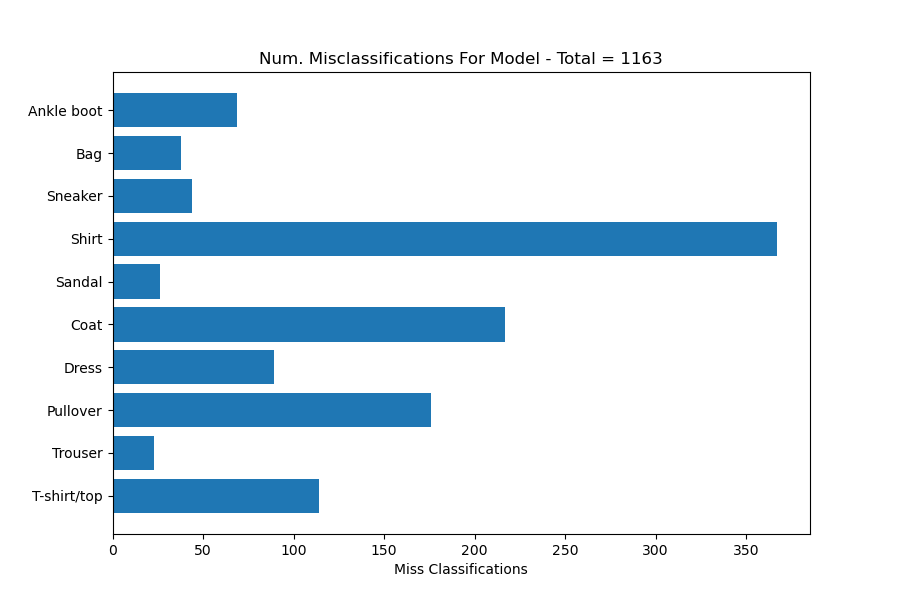

<IPython.core.display.Javascript object>


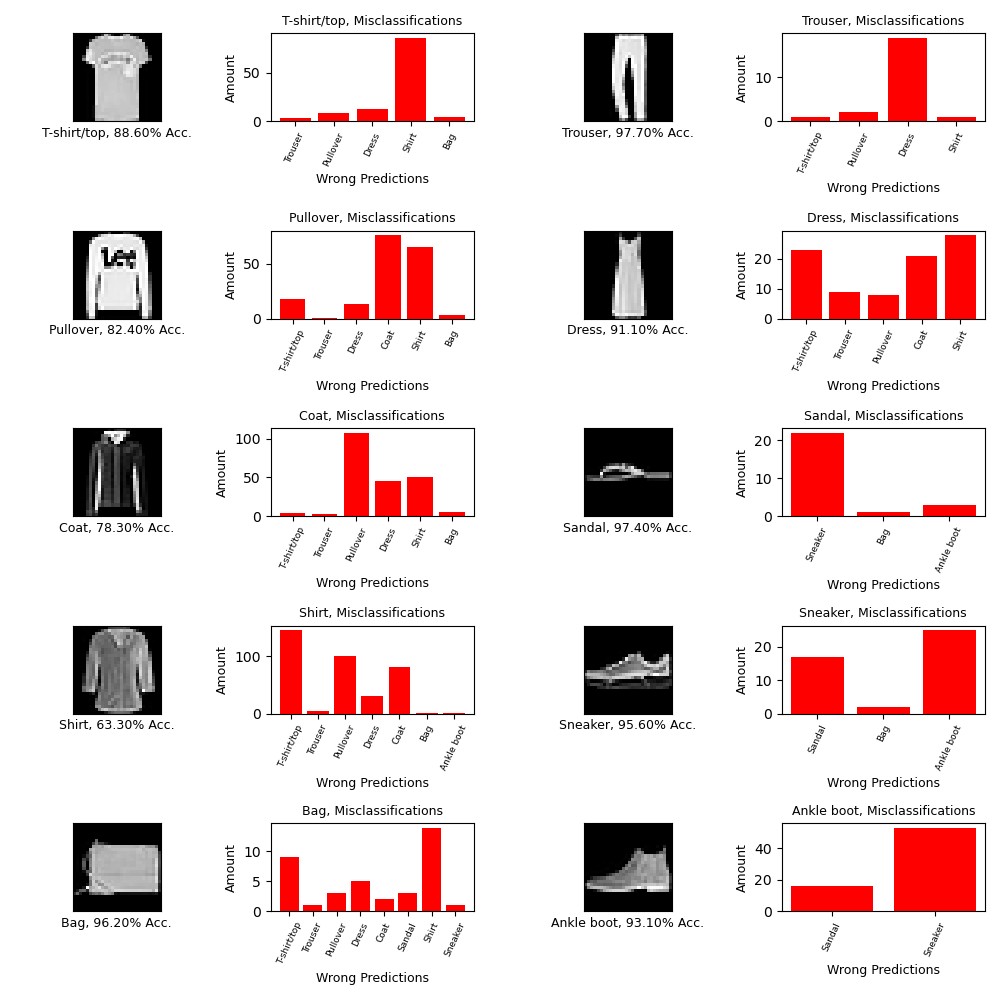

In [25]:
mis_cls_stats(preds1, y_test)

The model gave 8746 correct and 1254 wrong predictions giving
an accuracy rate of 0.8746 and an error rate of 0.1254 

Label/class T-shirt/top was miss labeled/classified 136 times
So approximately 10.85% of the misslabels were for T-shirt/top
the accuracy rate for the T-shirt/top alone was 86.40%

Label/class Trouser was miss labeled/classified 4 times
So approximately 0.32% of the misslabels were for Trouser
the accuracy rate for the Trouser alone was 99.60%

Label/class Pullover was miss labeled/classified 308 times
So approximately 24.56% of the misslabels were for Pullover
the accuracy rate for the Pullover alone was 69.20%

Label/class Dress was miss labeled/classified 203 times
So approximately 16.19% of the misslabels were for Dress
the accuracy rate for the Dress alone was 79.70%

Label/class Coat was miss labeled/classified 80 times
So approximately 6.38% of the misslabels were for Coat
the accuracy rate for the Coat alone was 92.00%

Label/class Sandal was miss labeled/class

<IPython.core.display.Javascript object>


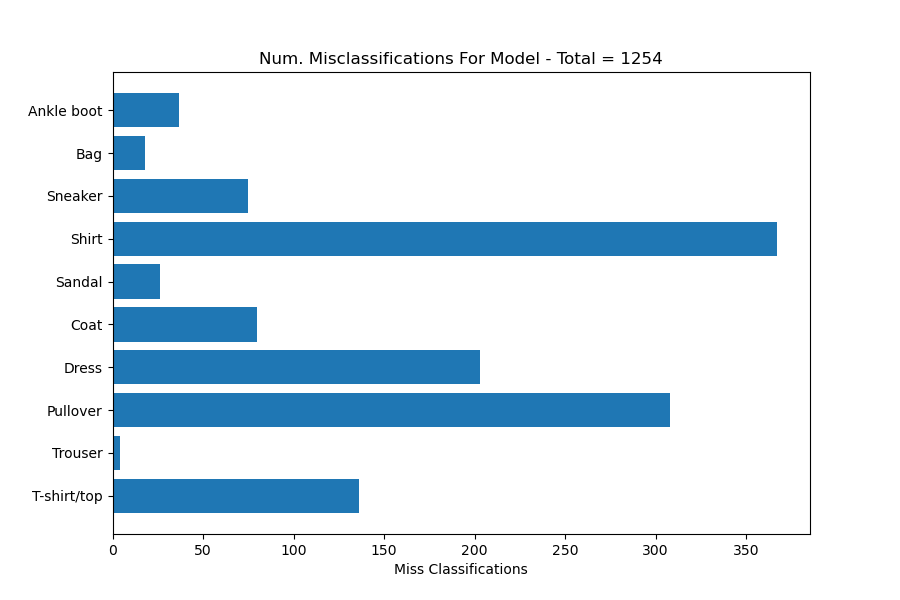

<IPython.core.display.Javascript object>


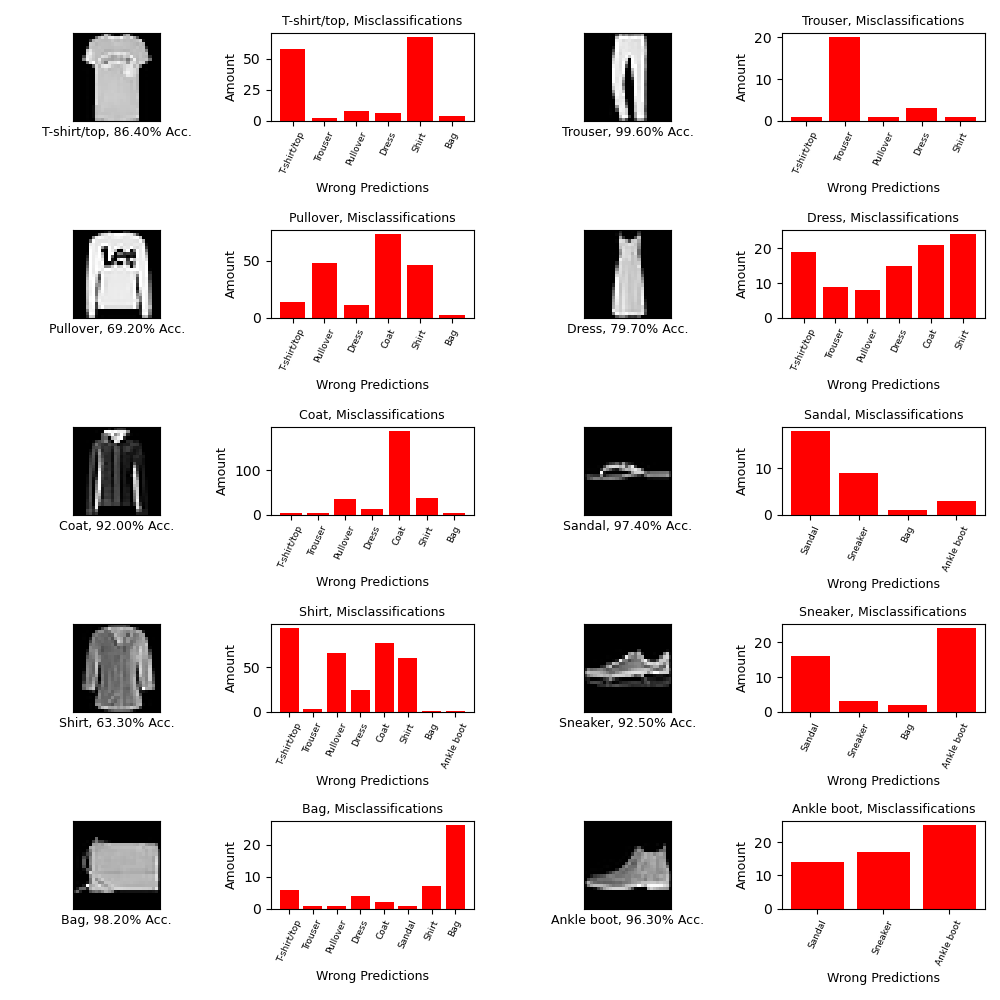

In [26]:
mis_cls_stats(preds2, y_test)

The model gave 8270 correct and 1730 wrong predictions giving
an accuracy rate of 0.827 and an error rate of 0.173 

Label/class T-shirt/top was miss labeled/classified 191 times
So approximately 11.04% of the misslabels were for T-shirt/top
the accuracy rate for the T-shirt/top alone was 80.90%

Label/class Trouser was miss labeled/classified 20 times
So approximately 1.16% of the misslabels were for Trouser
the accuracy rate for the Trouser alone was 98.00%

Label/class Pullover was miss labeled/classified 289 times
So approximately 16.71% of the misslabels were for Pullover
the accuracy rate for the Pullover alone was 71.10%

Label/class Dress was miss labeled/classified 255 times
So approximately 14.74% of the misslabels were for Dress
the accuracy rate for the Dress alone was 74.50%

Label/class Coat was miss labeled/classified 237 times
So approximately 13.70% of the misslabels were for Coat
the accuracy rate for the Coat alone was 76.30%

Label/class Sandal was miss labeled/clas

<IPython.core.display.Javascript object>


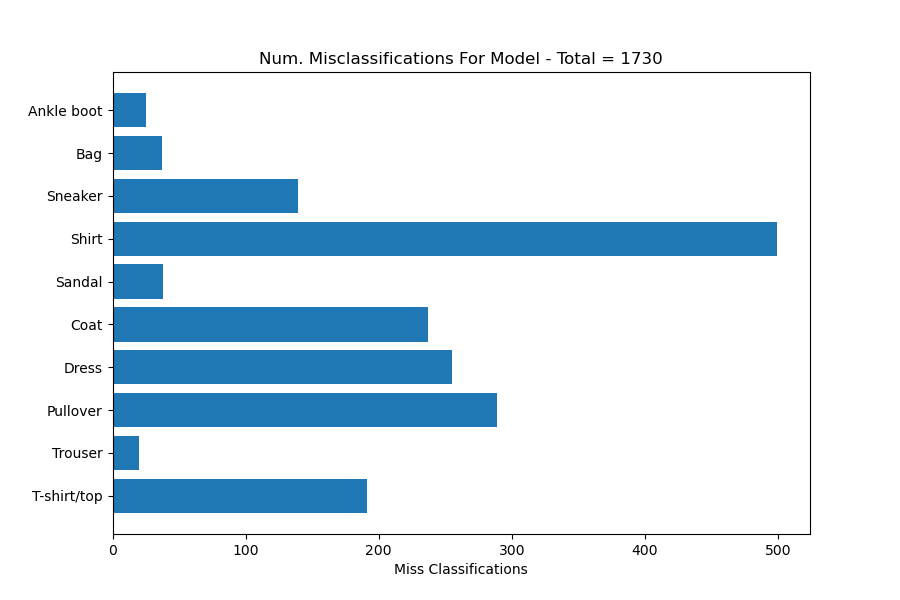

<IPython.core.display.Javascript object>


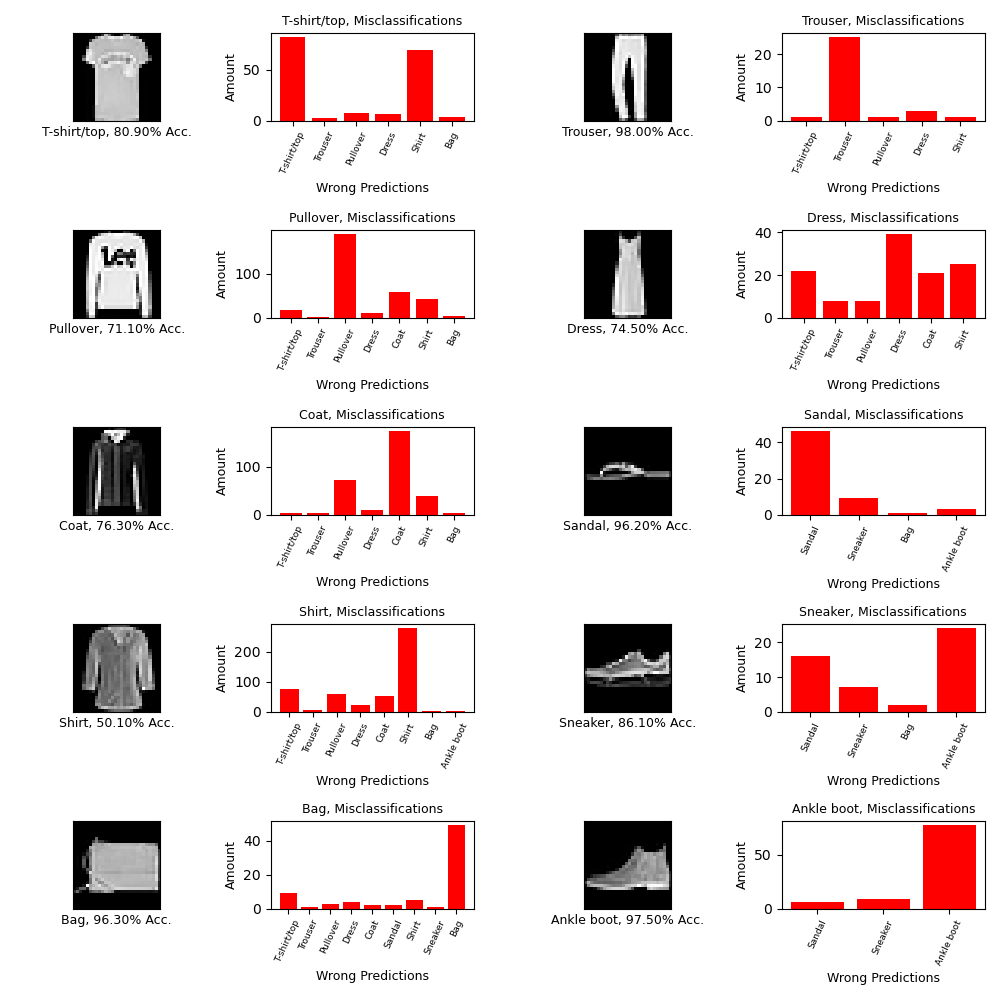

In [27]:
mis_cls_stats(preds3, y_test)

The model gave 8019 correct and 1981 wrong predictions giving
an accuracy rate of 0.8019 and an error rate of 0.1981 

Label/class T-shirt/top was miss labeled/classified 230 times
So approximately 11.61% of the misslabels were for T-shirt/top
the accuracy rate for the T-shirt/top alone was 77.00%

Label/class Trouser was miss labeled/classified 26 times
So approximately 1.31% of the misslabels were for Trouser
the accuracy rate for the Trouser alone was 97.40%

Label/class Pullover was miss labeled/classified 147 times
So approximately 7.42% of the misslabels were for Pullover
the accuracy rate for the Pullover alone was 85.30%

Label/class Dress was miss labeled/classified 381 times
So approximately 19.23% of the misslabels were for Dress
the accuracy rate for the Dress alone was 61.90%

Label/class Coat was miss labeled/classified 747 times
So approximately 37.71% of the misslabels were for Coat
the accuracy rate for the Coat alone was 25.30%

Label/class Sandal was miss labeled/cla

<IPython.core.display.Javascript object>


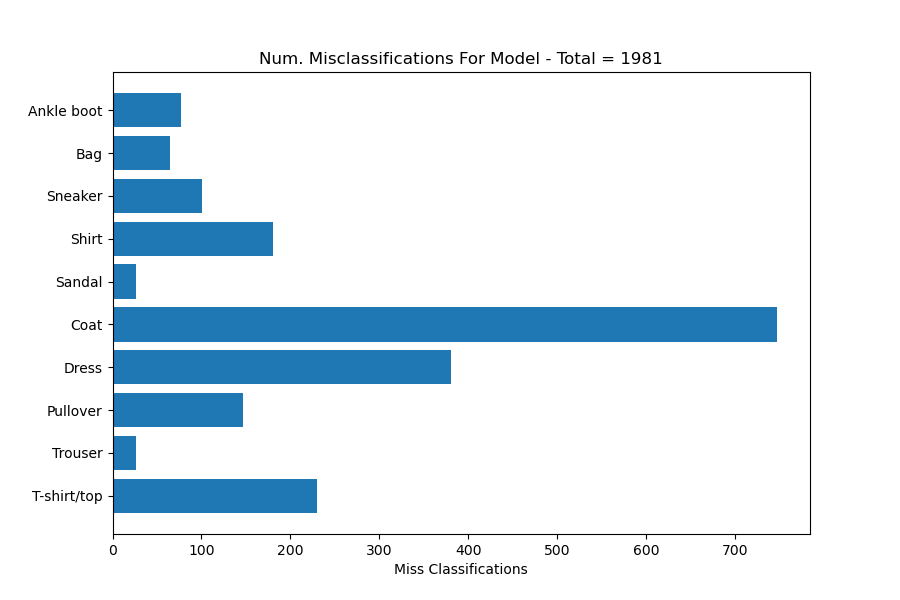

<IPython.core.display.Javascript object>


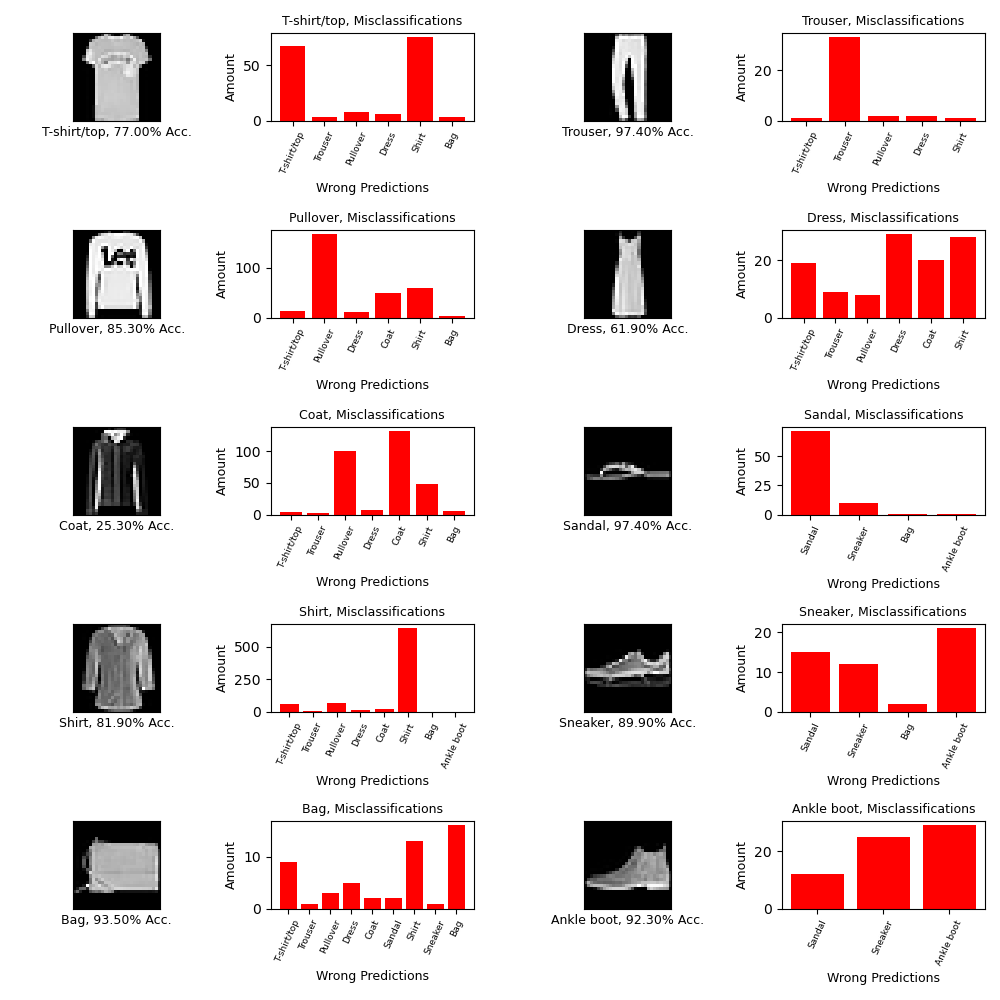

In [28]:
mis_cls_stats(preds4, y_test)

## model 1 had the best predictions 

In [29]:
history1.history

{'loss': [0.48934483528137207,
  0.36543378233909607,
  0.329510897397995,
  0.30538418889045715,
  0.28375861048698425,
  0.26663312315940857,
  0.2564621567726135,
  0.2451804131269455,
  0.23473358154296875,
  0.22509782016277313],
 'accuracy': [0.8238333463668823,
  0.8653958439826965,
  0.8788750171661377,
  0.8862500190734863,
  0.893791675567627,
  0.8997916579246521,
  0.9021458625793457,
  0.906208336353302,
  0.9100624918937683,
  0.9145625233650208],
 'val_loss': [0.45077192783355713,
  0.36809220910072327,
  0.3394169509410858,
  0.3394526541233063,
  0.3417304754257202,
  0.34709903597831726,
  0.31091055274009705,
  0.31812170147895813,
  0.33575764298439026,
  0.324034184217453],
 'val_accuracy': [0.8274999856948853,
  0.8676666617393494,
  0.8744999766349792,
  0.8784999847412109,
  0.8777499794960022,
  0.878166675567627,
  0.8885833621025085,
  0.8881666660308838,
  0.887583315372467,
  0.89041668176651]}

In [33]:
type(history1.history['loss'])

list

In [35]:
out_data = np.empty(shape=(4,10))
out_data[0] = history1.history['loss']
out_data[1] = history1.history['accuracy']
out_data[2] = history1.history['val_loss']
out_data[3] = history1.history['val_accuracy']
out_data = out_data.T

In [36]:
print(out_data)

[[0.48934484 0.82383335 0.45077193 0.82749999]
 [0.36543378 0.86539584 0.36809221 0.86766666]
 [0.3295109  0.87887502 0.33941695 0.87449998]
 [0.30538419 0.88625002 0.33945265 0.87849998]
 [0.28375861 0.89379168 0.34173048 0.87774998]
 [0.26663312 0.89979166 0.34709904 0.87816668]
 [0.25646216 0.90214586 0.31091055 0.88858336]
 [0.24518041 0.90620834 0.3181217  0.88816667]
 [0.23473358 0.91006249 0.33575764 0.88758332]
 [0.22509782 0.91456252 0.32403418 0.89041668]]
